Linear regression model

brief: Carbon dioxide emission of cars. Target - is to find the best correlation with CO2EMISSIONS 

In [2]:
file_name = 'dataset/FuelConsumption.csv'
!wget -nc -O $file_name https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

File `dataset/FuelConsumption.csv' already there; not retrieving.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv(file_name)
df.head()
volkswagen = df.loc[(df['MAKE'] == 'VOLKSWAGEN')]
volkswagen.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2014.0,2.211905,4.404762,10.423810,7.500000,9.116667,31.857143,216.000000
std,0.0,0.535201,0.700506,1.839381,1.264332,1.557502,6.071008,31.265191
min,2014.0,1.400000,4.000000,5.600000,5.200000,5.400000,23.000000,124.000000
25%,2014.0,2.000000,4.000000,9.500000,6.750000,8.275000,29.000000,197.000000
50%,2014.0,2.000000,4.000000,10.600000,7.600000,9.350000,30.000000,215.000000
75%,2014.0,2.500000,5.000000,11.200000,8.000000,9.800000,33.750000,225.000000
max,2014.0,3.600000,6.000000,14.300000,10.300000,12.300000,52.000000,283.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8780e2c90>,
      dtype=object)

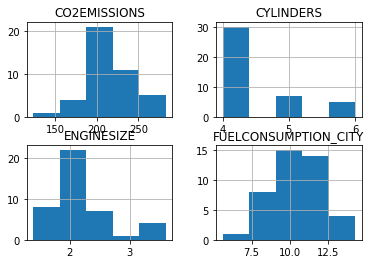

In [5]:
volkswagen[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']].hist(bins=5)

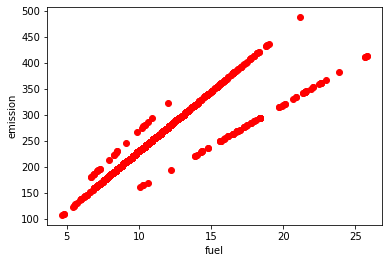

In [6]:
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'],  color='red')
plt.xlabel("fuel")
plt.ylabel("emission")
plt.show()

       FUELCONSUMPTION_COMB  CO2EMISSIONS
count            135.000000    135.000000
mean              10.771111    251.629630
std                2.233693     48.243744
min                5.400000    124.000000
25%                9.350000    219.500000
50%               10.600000    246.000000
75%               11.900000    277.000000
max               17.800000    409.000000


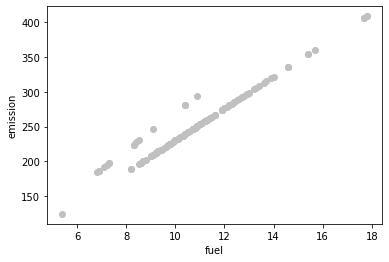

In [7]:
# just interesting if these three lines relate to different auto-groups, for example, VAG group?
# => at first glance, answer is 'not so much' 
vag_ls = {'AUDI', 'VOLKSWAGEN', 'SEAT', 'SKODA', 'PORSCHE'}
vag = df.loc[df['MAKE'].isin(vag_ls), ['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print(vag.describe())

plt.scatter(vag['FUELCONSUMPTION_COMB'], vag['CO2EMISSIONS'],  color='silver')
plt.xlabel("fuel")
plt.ylabel("emission")
plt.show()

       FUELCONSUMPTION_COMB  CO2EMISSIONS
count            932.000000     932.00000
mean              11.698176     256.89485
std                3.617197      65.26785
min                4.700000     108.00000
25%                8.975000     205.00000
50%               11.050000     252.00000
75%               13.800000     294.00000
max               25.800000     488.00000


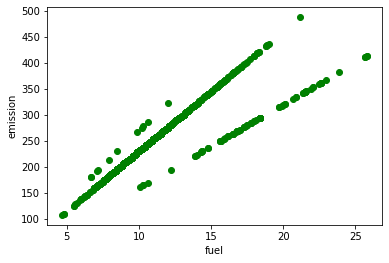

In [8]:
non_vag = df.loc[~df['MAKE'].isin(vag_ls), ['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print(non_vag.describe())

plt.scatter(non_vag['FUELCONSUMPTION_COMB'], non_vag['CO2EMISSIONS'],  color='green')
plt.xlabel("fuel")
plt.ylabel("emission")
plt.show()

In [20]:
# let's true this amazing&magic 'Linear Regression'
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

from sklearn import linear_model
lin_regr = linear_model.LinearRegression()

features = ['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']
train_x = train[features]
train_y = train[['CO2EMISSIONS']]

lin_regr.fit(train_x, train_y)
print(lin_regr.coef_, lin_regr.intercept_)

# plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  color='blue')
# plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

[[9.61647748 9.76786083 8.05331891]] [64.52754731]


In [37]:
# validate
from sklearn.metrics import r2_score

test_x = test[features]
test_y = test[['CO2EMISSIONS']]
test_y_pr = lin_regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pr - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pr - test_y) ** 2))
print("R2-score: %.5f" % r2_score(test_y , test_y_pr) )
print("R2-score: %.5f" % lin_regr.score(test_x , test_y) )

Mean absolute error: 16.16
Residual sum of squares (MSE): 529.52
R2-score: 0.86403
R2-score: 0.86403


Polynomial regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

In [98]:
# x to poly(1+x+x^2)
train_x_poly = PolynomialFeatures(degree=2).fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

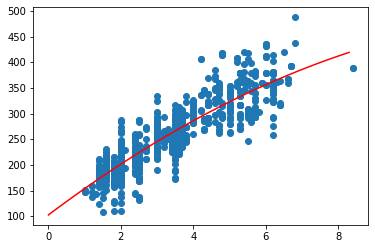

In [101]:
plin_regr = linear_model.LinearRegression()
plin_regr.fit(train_x_poly, train_y)

ar_x = np.arange(0, df['ENGINESIZE'].max(), 0.1)
ar_y = (plin_regr.intercept_[0] + plin_regr.coef_[0][0] 
                 + plin_regr.coef_[0][1]*ar + plin_regr.coef_[0][2]*(ar**2))

plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.plot(ar_x, ar_y, '-r')

In [103]:
# evaluation
test_x_poly = PolynomialFeatures(degree=2).fit_transform(test_x)
y_pred = plin_regr.predict(test_x_poly)
print("R^2 score %.5f" % r2_score(y_pred, test_y))
print("R^2 score %.5f" % plin_regr.score(test_x_poly, test_y))

R^2 score 0.72594
R^2 score 0.76302
